# Most of the scanario we use Sandaerdization

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("wine_data.csv",header=None,usecols=[0,1,2])

In [3]:
df.rename(columns={0:"class_label",1:"Alcohol",2:"Malic_acid"},
          errors="raise",
          inplace=True)

In [41]:
df.sample(10)

,class_label,Alcohol,Malic_acid
31,1,13.58,1.66
142,3,13.52,3.17
15,1,13.63,1.81
170,3,12.20,3.03
161,3,13.69,3.26
119,2,12.00,3.43
51,1,13.83,1.65
144,3,12.25,3.88
173,3,13.71,5.65
67,2,12.37,1.17


In [12]:
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

<AxesSubplot:xlabel='Alcohol', ylabel='Density'>

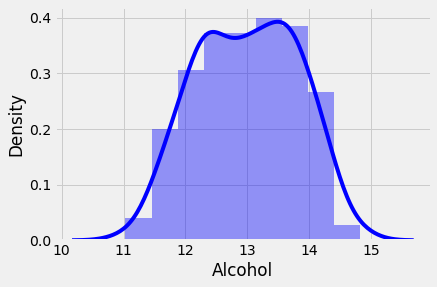

In [20]:
plt.style.use("fivethirtyeight")
sns.distplot(df["Alcohol"],color="blue")

In [16]:
df["Alcohol"].max()

14.83

<AxesSubplot:xlabel='Malic_acid', ylabel='Density'>

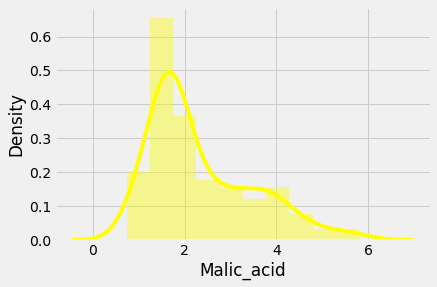

In [25]:
sns.distplot(df["Malic_acid"],color="yellow")

<AxesSubplot:xlabel='Alcohol', ylabel='Malic_acid'>

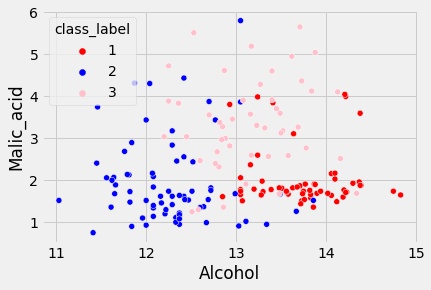

In [46]:
color_dist={1:"red",2:"blue",3:"pink"}
sns.scatterplot(df["Alcohol"],df["Malic_acid"],color="red",
                hue=df["class_label"],
                palette=color_dist)

In [48]:
df.head(1)

,class_label,Alcohol,Malic_acid
0,1,14.23,1.71


In [50]:
X = df.iloc[:,1:]

In [52]:
y = df.iloc[:,0]

# Train Test Split 

In [47]:
from sklearn.model_selection import train_test_split

In [127]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1,
                                                 random_state=0)

In [128]:
X_train.shape,X_test.shape

((160, 2), (18, 2))

# Normalization [0,1] 
# Scalling

In [129]:
from sklearn.preprocessing import MinMaxScaler

In [130]:
sc  = MinMaxScaler()

In [131]:
sc.fit(X_train)
X_train_sc = sc.transform(X_train)
X_test_sc = sc.transform(X_test)

In [132]:
X_train_sc.shape

(160, 2)

# Convert into Dataframe 

In [133]:
X_train_sc = pd.DataFrame(X_train_sc,columns=[["Alcohol","Malic_acid"]])

In [134]:
X_test_sc = pd.DataFrame(X_test_sc,columns=[["Alcohol","Malic_acid"]])

In [135]:
X_train_sc

,Alcohol,Malic_acid
0,0.423684,0.126273
1,0.736842,0.185336
2,0.547368,0.054990
3,0.531579,0.185336
4,0.581579,0.376782
...,...,...
155,0.207895,0.199593
156,0.352632,0.087576
157,0.365789,0.177189
158,0.755263,0.191446


In [136]:
# Min and Max is [0,1]
X_train_sc.describe()

,Alcohol,Malic_acid
count,160.000000,160.000000
mean,0.516694,0.325649
std,0.213092,0.223212
min,0.000000,0.000000
25%,0.350658,0.176680
50%,0.531579,0.230143
75%,0.688816,0.487271
max,1.000000,1.000000


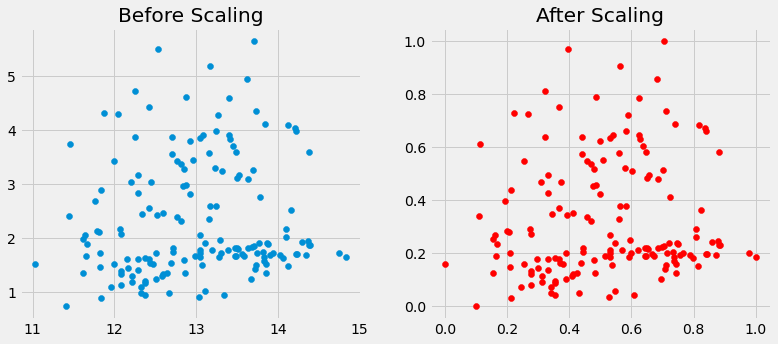

In [137]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(X_train['Alcohol'], X_train['Malic_acid'])
ax1.set_title("Before Scaling")
ax2.scatter(X_train_sc['Alcohol'], X_train_sc['Malic_acid'],color='red')
ax2.set_title("After Scaling")
plt.show()

In [138]:
from sklearn.linear_model import LogisticRegression

In [139]:
model = LogisticRegression()

In [140]:
model.fit(X_train_sc,y_train)

LogisticRegression()

In [141]:
y_pred = model.predict(X_test_sc)

In [142]:
y_pred

array([1, 2, 2, 1, 3, 2, 1, 3, 2, 2, 1, 3, 1, 2, 1, 2, 1, 1])

In [143]:
y_test

54     1
151    3
63     2
55     1
123    2
121    2
7      1
160    3
106    2
90     2
141    3
146    3
5      1
98     2
168    3
80     2
33     1
18     1
Name: class_label, dtype: int64

In [144]:
from sklearn.metrics import accuracy_score

In [145]:
accuracy_score(y_test,y_pred)

0.7777777777777778

In [146]:
model.predict([["14.23","1.71"]])

array([1])

# KNN

In [147]:
from sklearn.neighbors import KNeighborsClassifier

In [148]:
model1  = KNeighborsClassifier()

In [149]:
model1.fit(X_train_sc,y_train)
y_pred1 = model1.predict(X_test_sc)
accuracy_score(y_test,y_pred1)

0.8888888888888888